<a href="https://colab.research.google.com/github/shreyashnaidu/Movie-Sentiment-analysis-Using-LSTM/blob/main/Sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

print("Dataset Loaded Successfully!")
print(data.info())


Saving TrainingData-modified.csv to TrainingData-modified.csv
Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 531 entries, Unnamed: 0 to ZONEID
dtypes: float64(2), int64(529)
memory usage: 80.8 MB
None


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import joblib


In [ ]:
print(data.columns)

print(data.head())

print(data.isnull().sum())


Index(['Unnamed: 0', 'WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005',
       'WAP006', 'WAP007', 'WAP008', 'WAP009',
       ...
       'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP', 'ZONEID'],
      dtype='object', length=531)
   Unnamed: 0  WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  \
0           0     100     100     100     100     100     100     100     100   
1           1     100     100     100     100     100     100     100     100   
2           2     100     100     100     100     100     100     100     -97   
3           3     100     100     100     100     100     100     100     100   
4           4     100     100     100     100     100     100     100     100   

   WAP009  ...  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ... -7541.2643  4.864921e+06      2           1      106   
1     100  ... -7536.6212  4.864934e+06      2           1      106   

In [ ]:
wap_columns = [col for col in data.columns if col.startswith('WAP')]

X = data[wap_columns]
y_building = data['BUILDINGID']
y_floor = data['FLOOR']
y_coords = data[['LATITUDE', 'LONGITUDE']]


In [ ]:
X.fillna(-110, inplace=True)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_building, y_test_building = train_test_split(
    X, y_building, test_size=0.2, random_state=42
)

X_train_coords, X_test_coords, y_train_coords, y_test_coords = train_test_split(
    X, y_coords, test_size=0.2, random_state=42
)



<ipython-input-6-b4680813e64a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(-110, inplace=True)


In [ ]:
print(X.describe())


             WAP001        WAP002   WAP003   WAP004        WAP005  \
count  19937.000000  19937.000000  19937.0  19937.0  19937.000000   
mean      99.823644     99.820936    100.0    100.0     99.613733   
std        5.866842      5.798156      0.0      0.0      8.615657   
min      -97.000000    -90.000000    100.0    100.0    -97.000000   
25%      100.000000    100.000000    100.0    100.0    100.000000   
50%      100.000000    100.000000    100.0    100.0    100.000000   
75%      100.000000    100.000000    100.0    100.0    100.000000   
max      100.000000    100.000000    100.0    100.0    100.000000   

             WAP006        WAP007        WAP008        WAP009        WAP010  \
count  19937.000000  19937.000000  19937.000000  19937.000000  19937.000000   
mean      97.130461     94.733661     93.820234     94.693936     99.163766   
std       22.931890     30.541335     33.010404     30.305084     12.634045   
min      -98.000000    -99.000000    -98.000000    -98.000000 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print(X_train.shape, y_train_building.shape)
print(X_train_coords.shape, y_train_coords.shape)

print(pd.isnull(X_train).sum().sum())


(15949, 520) (15949,)
(15949, 520) (15949, 2)
0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train_reduced = pca.fit_transform(X_train_sample)
X_test_reduced = pca.transform(X_test_sample)

In [ ]:
from sklearn.decomposition import PCA

sample_size = 1000
X_train_sample = X_train[:sample_size]
X_test_sample = X_test[:sample_size]
y_train_sample = y_train_building[:sample_size] # Create a sample for y_train_building

pca = PCA(n_components=50)
X_train_reduced = pca.fit_transform(X_train_sample)
X_test_reduced = pca.transform(X_test_sample)


--- Model Performance ---
                                   MSE       MAE         R2
Linear Regression             0.056940  0.177604   0.917773
Random Forest Regression      0.005771  0.010347   0.991666
XGBoost Regression            0.004071  0.006877   0.994121
KNN Regression                0.005000  0.009800   0.992780
Neural Network               59.182028  5.277035 -84.464004
Decision Tree Regression      0.006280  0.007000   0.990931
Support Vector Regression     0.012786  0.076624   0.981536
Gaussian Process Regression   2.137884  1.202122  -2.087290


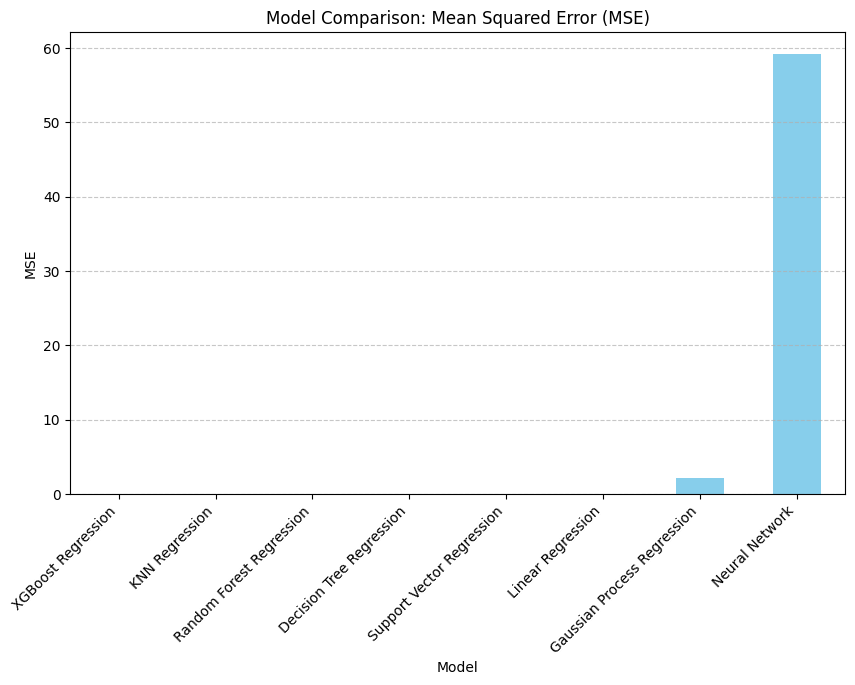

In [ ]:
# Results dictionary
results = {}

# Helper function to evaluate models
def evaluate_model(model_name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# --- Models ---

# Assuming you have y_test_building from your train_test_split
# Create a sample for y_test_building similar to how you created X_train_sample
sample_size = 1000
y_test_sample = y_test_building[:sample_size]

# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reduced, y_train_sample)
predictions = lin_reg.predict(X_test_reduced)
evaluate_model('Linear Regression', y_test_sample, predictions)

# 2. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_reg.fit(X_train_reduced, y_train_sample)
predictions = rf_reg.predict(X_test_reduced)
evaluate_model('Random Forest Regression', y_test_sample, predictions)

# 3. Gradient Boosting Machines (XGBoost)
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_reg.fit(X_train_reduced, y_train_sample)
predictions = xgb_reg.predict(X_test_reduced)
evaluate_model('XGBoost Regression', y_test_sample, predictions)

# 4. K-Nearest Neighbors (KNN)
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reduced, y_train_sample)
predictions = knn_reg.predict(X_test_reduced)
evaluate_model('KNN Regression', y_test_sample, predictions)

# 5. Neural Networks
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_reduced, y_train_sample)
predictions = mlp.predict(X_test_reduced)
evaluate_model('Neural Network', y_test_sample, predictions)

# 6. Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reduced, y_train_sample)
predictions = dt_reg.predict(X_test_reduced)
evaluate_model('Decision Tree Regression', y_test_sample, predictions)

# 7. Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=1, gamma='scale')
svr.fit(X_train_reduced, y_train_sample)
predictions = svr.predict(X_test_reduced)
evaluate_model('Support Vector Regression', y_test_sample, predictions)

# 8. Gaussian Process Regression
gpr = GaussianProcessRegressor(random_state=42)
gpr.fit(X_train_reduced, y_train_sample)
predictions = gpr.predict(X_test_reduced)
evaluate_model('Gaussian Process Regression', y_test_sample, predictions)

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Display results
print("\n--- Model Performance ---")
print(results_df)

# Plot results
results_df['MSE'].sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


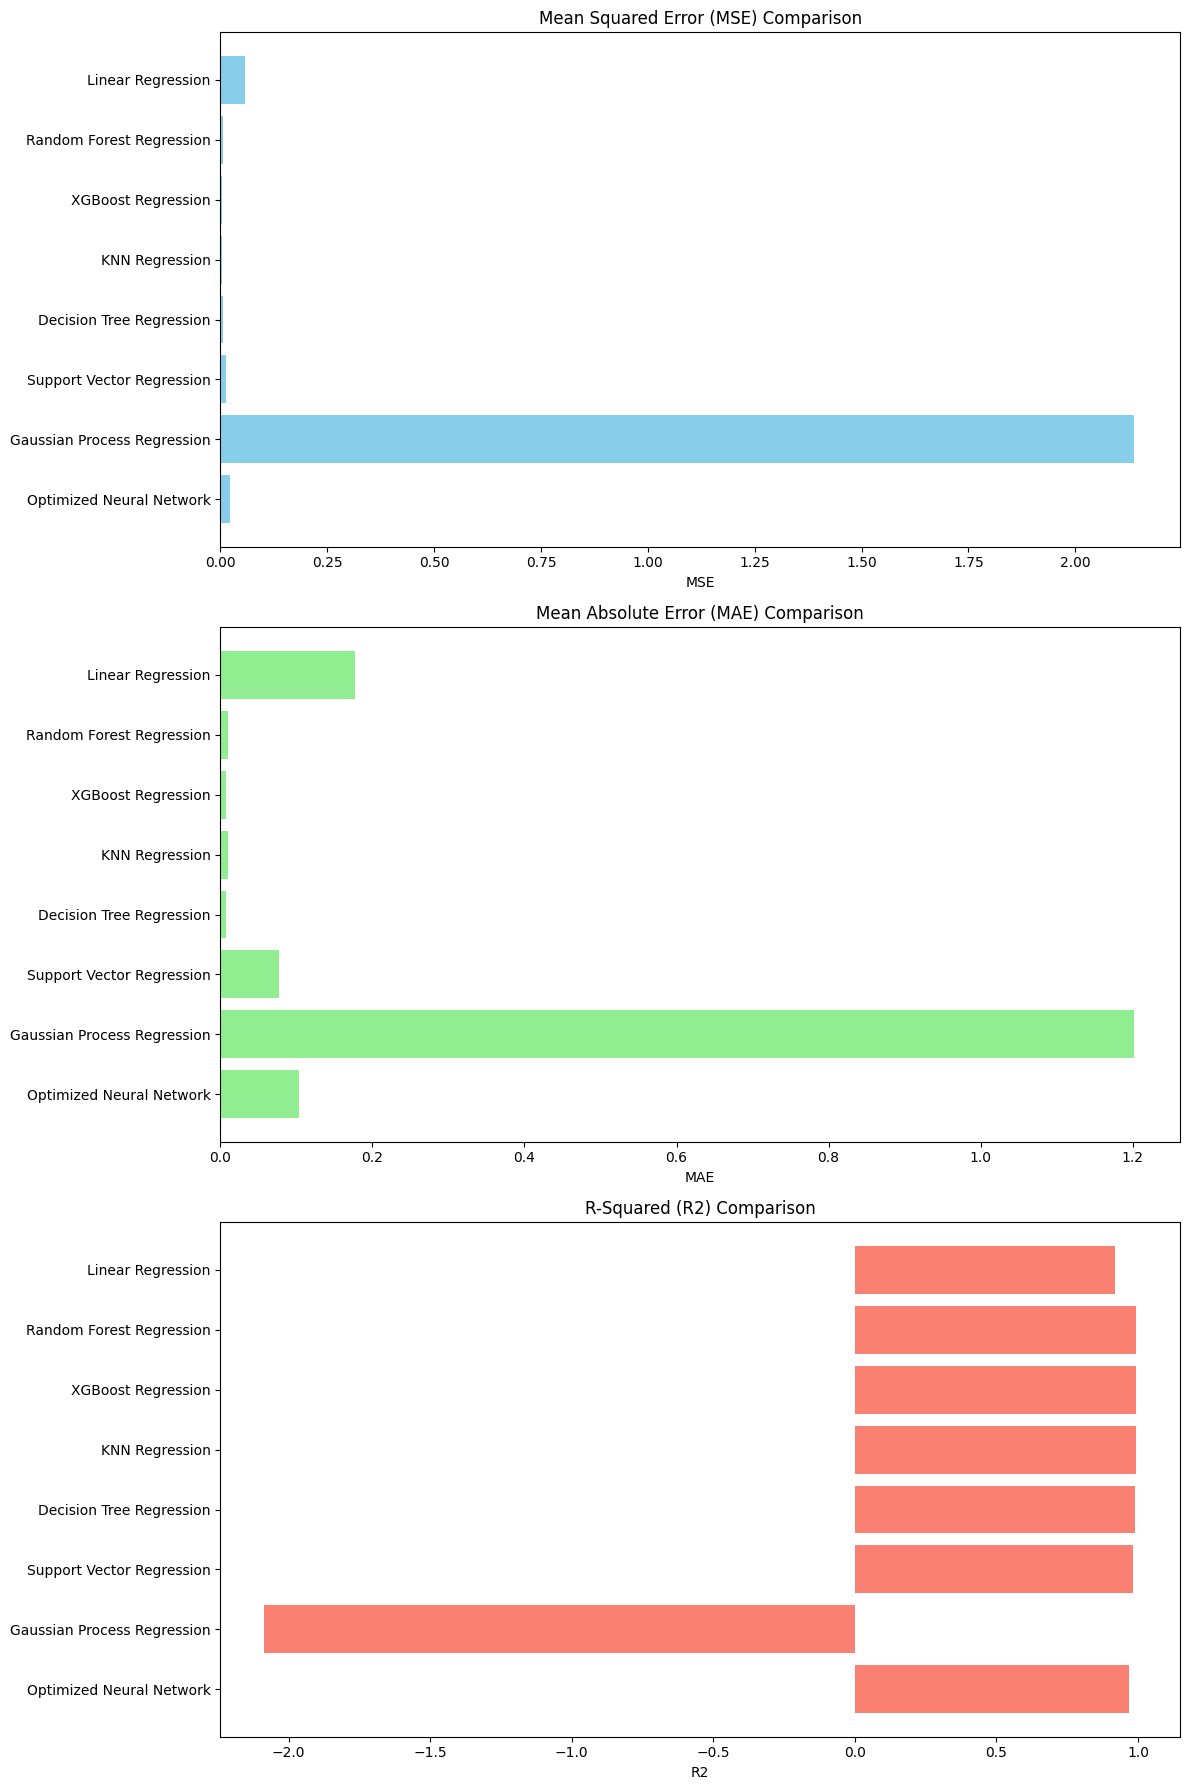

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for comparison
data = {
    'Model': [
        'Linear Regression', 'Random Forest Regression', 'XGBoost Regression',
        'KNN Regression', 'Decision Tree Regression',
        'Support Vector Regression', 'Gaussian Process Regression', 'Optimized Neural Network'
    ],
    'MSE': [
        0.056940, 0.005771, 0.004071, 0.005000, 0.006280,
        0.012786, 2.137884, 0.0221
    ],
    'MAE': [
        0.177604, 0.010347, 0.006877, 0.009800, 0.007000,
        0.076624, 1.202122, 0.1035
    ],
    'R2': [
        0.917773, 0.991666, 0.994121, 0.992780, 0.990931,
        0.981536, -2.087290, 0.9681
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create subplots for MSE, MAE, and R2
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# MSE Plot
axes[0].barh(df['Model'], df['MSE'], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE) Comparison')
axes[0].set_xlabel('MSE')
axes[0].invert_yaxis()

# MAE Plot
axes[1].barh(df['Model'], df['MAE'], color='lightgreen')
axes[1].set_title('Mean Absolute Error (MAE) Comparison')
axes[1].set_xlabel('MAE')
axes[1].invert_yaxis()

# R2 Plot
axes[2].barh(df['Model'], df['R2'], color='salmon')
axes[2].set_title('R-Squared (R2) Comparison')
axes[2].set_xlabel('R2')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# Ensure input scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001],  # L2 penalty (regularization)
}

# Initialize MLPRegressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
grid_search.fit(X_train_scaled, y_train_sample)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train and evaluate the best model
best_mlp = grid_search.best_estimator_
predictions = best_mlp.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test_sample, predictions)
mae = mean_absolute_error(y_test_sample, predictions)
r2 = r2_score(y_test_sample, predictions)

print("\n--- Optimized Neural Network Performance ---")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptiv


--- Model Comparison with New Metrics ---
                                 MSE      MAE        R2  Accuracy  Recall  \
Neural Network (Optimized)  0.022098  0.10352  0.968089     0.627   0.627   

                                  F1  
Neural Network (Optimized)  0.770744  


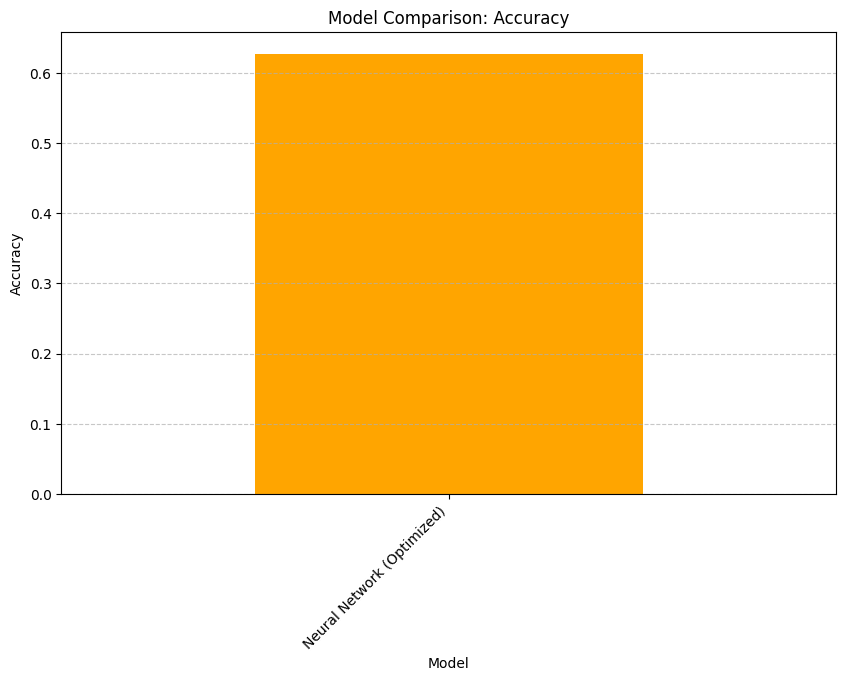

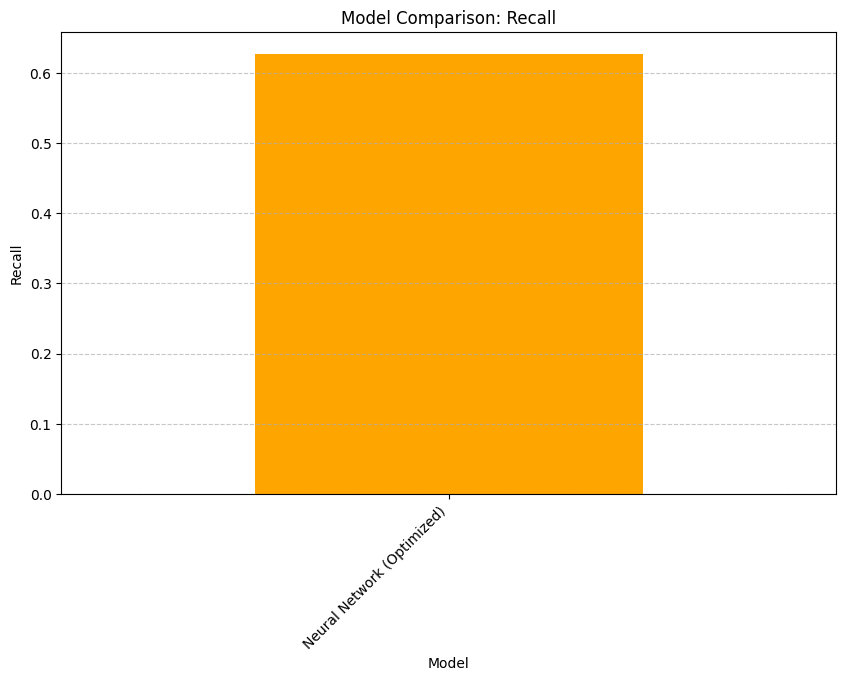

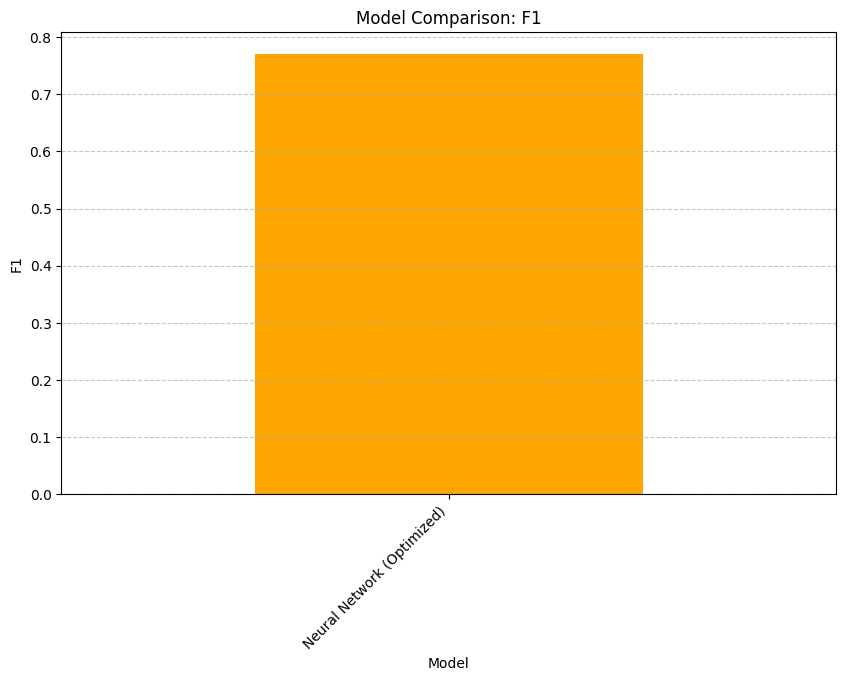

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Define tolerance for accuracy
tolerance = 0.1  # Predicted values within 10% of the actual values are considered accurate

def regression_accuracy(y_true, y_pred, tolerance):
    # Calculate absolute error
    errors = abs(y_true - y_pred)
    # Count predictions within tolerance
    accurate_count = (errors <= tolerance).sum()
    return accurate_count / len(y_true)

def regression_f1_recall(y_true, y_pred, tolerance):
    # Binarize predictions as "accurate" or "not accurate" based on tolerance
    accurate = abs(y_true - y_pred) <= tolerance
    y_true_binary = [1] * len(y_true)  # True values are always "1" (accurate)
    y_pred_binary = accurate.astype(int)  # Predicted binary accuracy

    recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)
    return recall, f1

# Add new metrics to the evaluate_model function
def evaluate_model_with_new_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = regression_accuracy(y_true, y_pred, tolerance)
    recall, f1 = regression_f1_recall(y_true, y_pred, tolerance)
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1': f1
    }

results = {}

evaluate_model_with_new_metrics('Neural Network (Optimized)', y_test_sample, predictions)
comparison_df = pd.DataFrame(results).T

# Display results
print("\n--- Model Comparison with New Metrics ---")
print(comparison_df)

# Plot results for additional metrics
for metric in ['Accuracy', 'Recall', 'F1']:
    comparison_df[metric].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='orange')
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



--- Sample Test Results ---
Sample 1: Predicted = 0.0033, Actual = 0.0000, Error = 0.0033
Sample 2: Predicted = 0.9886, Actual = 1.0000, Error = 0.0114
Sample 3: Predicted = 2.1812, Actual = 2.0000, Error = 0.1812
Sample 4: Predicted = 1.7531, Actual = 2.0000, Error = 0.2469
Sample 5: Predicted = 1.0651, Actual = 1.0000, Error = 0.0651
Sample 6: Predicted = 1.9822, Actual = 2.0000, Error = 0.0178
Sample 7: Predicted = 0.0411, Actual = 0.0000, Error = 0.0411
Sample 8: Predicted = 2.0500, Actual = 2.0000, Error = 0.0500
Sample 9: Predicted = 0.0354, Actual = 0.0000, Error = 0.0354
Sample 10: Predicted = -0.0505, Actual = 0.0000, Error = 0.0505

Accuracy within 0.1: 80.00%


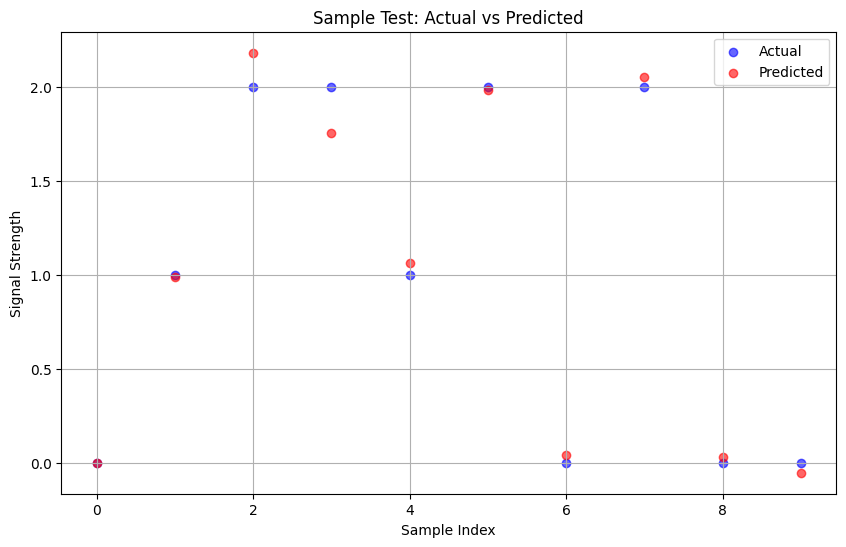

In [ ]:
sample_size = 10  # Select 10 samples for testing
X_sample = X_test_scaled[:sample_size]

y_sample_actual = y_test_sample[:sample_size]

# Fit the model with training data before making predictions
best_mlp.fit(X_train_scaled, y_train_sample) # Make sure to use best_mlp from GridSearchCV
sample_test(best_mlp, X_sample, y_sample_actual)  # Make sure to use best_mlp

Unique Floor Values: [3 1 2 0 4]


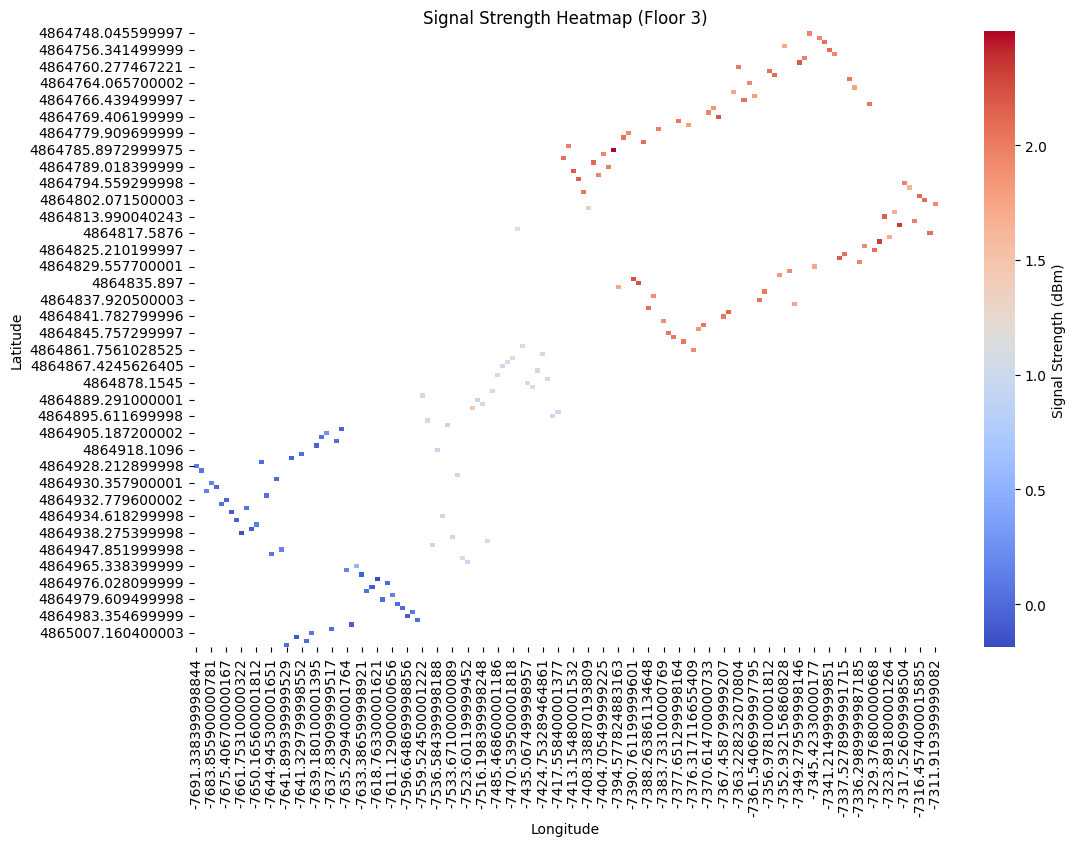

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict signal strength using the scaled data that matches the model's input
predicted_signal_strength = best_mlp.predict(X_test_scaled)

# Get the original indices from X_test before scaling and PCA
original_indices = X_test.index[:len(X_test_scaled)]

# Create heatmap_data using the original data (data) and predicted values
heatmap_data = pd.DataFrame({
    'LATITUDE': data.loc[original_indices, 'LATITUDE'],
    'LONGITUDE': data.loc[original_indices, 'LONGITUDE'],
    'FLOOR': data.loc[original_indices, 'FLOOR'],
    'Predicted_Signal_Strength': predicted_signal_strength
})

# Check unique floors
print("Unique Floor Values:", heatmap_data['FLOOR'].unique())

# Select a floor to visualize
floor_to_visualize = heatmap_data['FLOOR'].unique()[0]  # Choose the first unique floor
floor_data = heatmap_data[heatmap_data['FLOOR'] == floor_to_visualize]

# Generate the heatmap
plt.figure(figsize=(12, 8))
heatmap_pivot = floor_data.pivot_table(
    index='LATITUDE', columns='LONGITUDE', values='Predicted_Signal_Strength'
)
sns.heatmap(heatmap_pivot, cmap='coolwarm', cbar_kws={'label': 'Signal Strength (dBm)'})
plt.title(f"Signal Strength Heatmap (Floor {floor_to_visualize})")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Number of Dead Zone Points: 265
           LATITUDE  LONGITUDE  FLOOR  Predicted_Signal_Strength
10958  4.864926e+06 -7646.7758      3                   0.003334
18233  4.864938e+06 -7656.6357      0                   0.041063
16047  4.864938e+06 -7656.6357      0                   0.035405
17646  4.864936e+06 -7669.2478      3                  -0.050487
16428  4.864913e+06 -7639.1801      2                  -0.017809


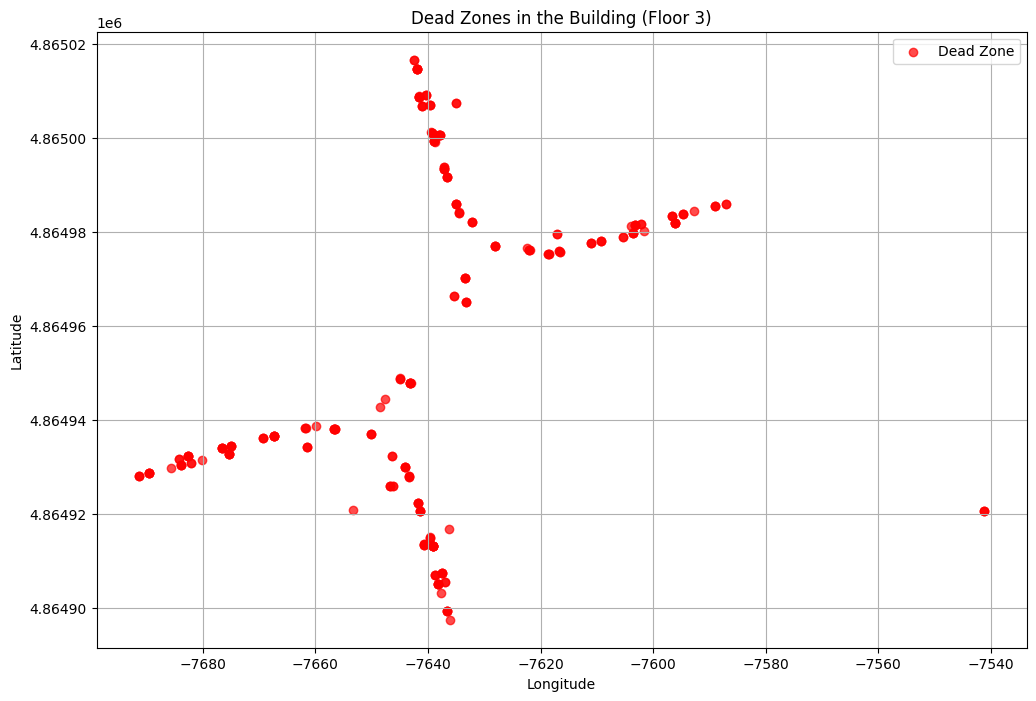

In [ ]:
dead_zone_threshold = 0.5

dead_zones = heatmap_data[heatmap_data['Predicted_Signal_Strength'] <= dead_zone_threshold]

print(f"Number of Dead Zone Points: {len(dead_zones)}")
print(dead_zones.head())
plt.figure(figsize=(12, 8))
plt.scatter(dead_zones['LONGITUDE'], dead_zones['LATITUDE'], color='red', label='Dead Zone', alpha=0.7)
plt.title(f"Dead Zones in the Building (Floor {floor_to_visualize})")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()
